In [13]:
%pip install matplotlib
%pip install pandas openpyxl
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd

data = pd.read_csv("D:\stock market\stock_data.csv") # Replace with your file name
data

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Amala\AppData\Local\Temp\ipykernel_1660\4127674694.py:3: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("D:\stock market\stock_data.csv") # Replace with your file name


,year,company,ticker,Avg_Price_Change_Percent,Avg_Trading_Volume,earnings growth,capital investment,Primary_Volume_Driver,Growth score,Growth_Indicators,Market_Sentiment,Macroeconomic_Context,Unnamed: 12,Unnamed: 13
0,2020,Apple,AAPL,-6.8,138000000,-3,medium,COVID-19 uncertainty,4,"Strong cash reserves, stable earnings",Bearish,Global recession,NaN,NaN
1,2021,Apple,AAPL,18.4,102000000,14,high,iPhone demand rebound,8,"Revenue recovery, services growth",Bullish,Economic recovery,NaN,NaN
2,2022,Apple,AAPL,-9.3,95000000,5,medium,Inflation concerns,5,Slowing growth outlook,Bearish,High inflation,NaN,NaN
3,2023,Apple,AAPL,12.1,88000000,9,high,AI & services optimism,7,Moderate earnings growth,Bullish,Stabilizing economy,NaN,NaN
4,2024,Apple,AAPL,9.7,86000000,8,high,Buyback announcements,7,Capital return focus,Bullish,Stable GDP,NaN,NaN
5,2025,Apple,AAPL,7.2,82000000,6,medium,Market maturity,6,Steady long-term growth,Neutral,Low inflation,NaN,NaN
6,2020,Microsoft,MSFT,-4.1,42000000,10,high,Pandemic tech demand,6,Cloud growth acceleration,Bullish,Global recession,NaN,NaN
7,2021,Microsoft,MSFT,21.6,39000000,18,high,Azure expansion,9,Strong earnings growth,Bullish,Recovery,NaN,NaN
8,2022,Microsoft,MSFT,-7.8,41000000,6,medium,Tech selloff,5,Slower enterprise spending,Bearish,Inflation,NaN,NaN
9,2023,Microsoft,MSFT,19.3,46000000,20,high,AI investments,9,Cloud + AI dominance,Very Bullish,Stable economy,NaN,NaN


In [35]:
from typing import NamedTuple,List,TypeAlias,Optional
from enum import Enum
import csv
import sys

class MarketSentiment(Enum):
    BEARISH = "bearish"
    BULLISH = "bullish"
    NEUTRAL = "neutral"
#interp. the trend if it is going Bearish ,Bullish and Neutral .
#exampeles are redundent for enumeration

# StockRecord: stores info for a single company in a single year
StockRecord = NamedTuple("StockRecord", [
    ("company_name", str),
    ("year", int),
    ("avg_price_change", float),
    ("earnings_growth", float),
    ("growth_score", float),
    ("growth_indicators", List[str]),
    ("market_sentiment", str),
    ("macroeconomic_context", str)
])

# CompanyComparison: summary for multi-company comparison
CompanyComparison = NamedTuple("CompanyComparison", [
    ("company_name", str),
    ("avg_price_change", float),
    ("avg_earnings_growth", float),
    ("avg_growth_score", float),
    ("dominant_sentiment", str),
    ("key_growth_indicators", List[str])
])

# Type alias for a list of StockRecords
StockRecordList = List[StockRecord]

In [36]:
import csv
def parse_market_sentiment(s:str)->MarketSentiment:
    """
    converts the string from the csv file  into a MarketSentiment enum
    """
    #return MarketSentiment.BULLISH #stub 
    if s.lower() == "bullish":
        return MarketSentiment.BULLISH
    elif s.lower() == "bearish":
        return MarketSentiment.BEARISH
    else:
        return MarketSentiment.NEUTRAL
    
# Helper: converts string from CSV into a list
def parse_growth_indicators(s: str) -> List[str]:
    if not s:
        return []
    return s.split(";")


def read_stock_records(filename: str) -> StockRecordList:
    """
    Reads stock data from a CSV file and returns a list of StockRecord.
    """
    records: StockRecordList = []

    with open(filename, newline='', encoding="utf-8") as file:
        reader = csv.reader(file)
        next(reader)  # skip header row

        for row in reader:
            record = StockRecord(
                company_name=row[1],
                year=int(row[0]),
                avg_price_change=float(row[3]),
                earnings_growth=float(row[5]),
                growth_score=float(row[8]),
                growth_indicators=parse_growth_indicators(row[9]),
                market_sentiment=parse_market_sentiment(row[10]),
                macroeconomic_context=row[11]
            )

            records.append(record)

    return records



In [40]:
from collections import Counter

# Returns all records for a given company
def records_for_company(records: StockRecordList, company: str) -> StockRecordList:
    return [r for r in records if r.company_name == company]


def analyze_company(records: StockRecordList, company: str) -> CompanyComparison:
    """
    Computes average metrics and key indicators for a single company.
    """
    company_records = records_for_company(records, company)
    if not company_records:
        return None  # No data for this company

    avg_price = sum(r.avg_price_change for r in company_records) / len(company_records)
    avg_earnings = sum(r.earnings_growth for r in company_records) / len(company_records)
    avg_growth = sum(r.growth_score for r in company_records) / len(company_records)

    # Dominant sentiment
    sentiment_count = Counter(r.market_sentiment for r in company_records)
    dominant_sentiment = sentiment_count.most_common(1)[0][0]

    # Combine growth indicators
    indicators = []
    for r in company_records:
        indicators.extend(r.growth_indicators)
    indicators = list(set(indicators))  # remove duplicates

    return CompanyComparison(
        company_name=company,
        avg_price_change=avg_price,
        avg_earnings_growth=avg_earnings,
        avg_growth_score=avg_growth,
        dominant_sentiment=dominant_sentiment,
        key_growth_indicators=indicators
    )

def compare_companies(records: StockRecordList, companies: List[str]) -> List[CompanyComparison]:
    comparisons = []
    for company in companies:
        comparison = analyze_company(records, company)
        if comparison:
            comparisons.append(comparison)
    return comparisons


In [41]:
import matplotlib.pyplot as plt

def plot_company_comparison(comparisons: List[CompanyComparison]) -> None:
    """
    Plots a side-by-side bar chart comparing multiple companies.
    """
    companies = [c.company_name for c in comparisons]
    avg_price = [c.avg_price_change for c in comparisons]
    avg_earnings = [c.avg_earnings_growth for c in comparisons]
    avg_growth = [c.avg_growth_score for c in comparisons]

    x = range(len(companies))
    width = 0.25

    plt.bar([i - width for i in x], avg_price, width=width, label="Avg Price Change", color='skyblue')
    plt.bar(x, avg_earnings, width=width, label="Avg Earnings Growth", color='lightgreen')
    plt.bar([i + width for i in x], avg_growth, width=width, label="Avg Growth Score", color='salmon')

    plt.xticks(x, companies)
    plt.xlabel("Companies")
    plt.ylabel("Metrics")
    plt.title("Company Performance Comparison (Post-Pandemic)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def print_company_comparison(comparisons: List[CompanyComparison]) -> None:
    """
    Prints a simple summary for each company for quick interpretation.
    """
    for c in comparisons:
        print(f"Company: {c.company_name}")
        print(f"  Avg Price Change: {c.avg_price_change:.2f}")
        print(f"  Avg Earnings Growth: {c.avg_earnings_growth:.2f}")
        print(f"  Avg Growth Score: {c.avg_growth_score:.2f}")
        print(f"  Dominant Sentiment: {c.dominant_sentiment}")
        print(f"  Key Growth Indicators: {', '.join(c.key_growth_indicators)}\n")


Company: Apple
  Avg Price Change: 5.22
  Avg Earnings Growth: 6.50
  Avg Growth Score: 6.17
  Dominant Sentiment: MarketSentiment.BULLISH
  Key Growth Indicators: Moderate earnings growth, Steady long-term growth, Slowing growth outlook, Strong cash reserves, stable earnings, Revenue recovery, services growth, Capital return focus

Company: Microsoft
  Avg Price Change: 9.00
  Avg Earnings Growth: 14.00
  Avg Growth Score: 7.33
  Dominant Sentiment: MarketSentiment.BULLISH
  Key Growth Indicators: Sustained growth, Strong earnings expansion, Cloud + AI dominance, Cloud growth acceleration, Slower enterprise spending, Strong earnings growth

Company: Tesla
  Avg Price Change: 19.87
  Avg Earnings Growth: 15.83
  Avg Growth Score: 7.00
  Dominant Sentiment: MarketSentiment.NEUTRAL
  Key Growth Indicators: Margin pressure, Rapid revenue growth, Long-term innovation, Slower growth pace, Improved margins, Global expansion



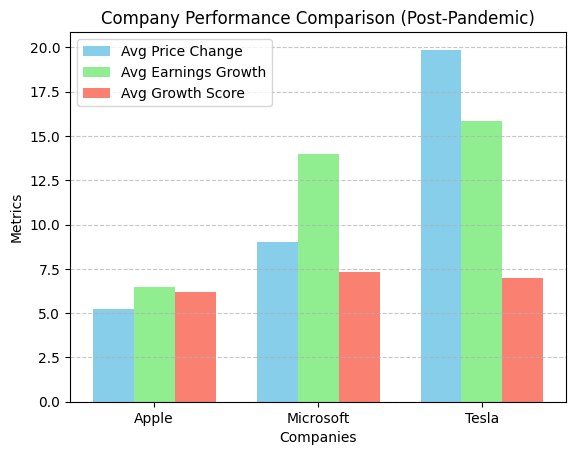

In [42]:
records = read_stock_records("stock_data.csv")
companies_to_compare = ["Apple", "Microsoft", "Tesla"]

comparisons = compare_companies(records, companies_to_compare)

# Print textual summary
print_company_comparison(comparisons)

# Show visual comparison
plot_company_comparison(comparisons)


In [44]:
def main(filename: str) -> None:
    """
    Main function for comparative stock analysis.

    Reads the CSV file, analyzes selected companies, prints summaries,
    and plots comparison graphs.
    """
    # Step 1: Read the dataset
    records = read_stock_records(filename)

    # Step 2: Select companies to compare
    companies_to_compare = ["Apple", "Microsoft", "Tesla"]

    # Step 3: Compute comparison metrics
    comparisons = compare_companies(records, companies_to_compare)

    # Step 4: Print textual summary
    print("\n--- Company Comparison Summary ---\n")
    print_company_comparison(comparisons)

    # Step 5: Plot visual comparison
    plot_company_comparison(comparisons)
    plt.show()



--- Company Comparison Summary ---

Company: Apple
  Avg Price Change: 5.22
  Avg Earnings Growth: 6.50
  Avg Growth Score: 6.17
  Dominant Sentiment: MarketSentiment.BULLISH
  Key Growth Indicators: Moderate earnings growth, Steady long-term growth, Slowing growth outlook, Strong cash reserves, stable earnings, Revenue recovery, services growth, Capital return focus

Company: Microsoft
  Avg Price Change: 9.00
  Avg Earnings Growth: 14.00
  Avg Growth Score: 7.33
  Dominant Sentiment: MarketSentiment.BULLISH
  Key Growth Indicators: Sustained growth, Strong earnings expansion, Cloud + AI dominance, Cloud growth acceleration, Slower enterprise spending, Strong earnings growth

Company: Tesla
  Avg Price Change: 19.87
  Avg Earnings Growth: 15.83
  Avg Growth Score: 7.00
  Dominant Sentiment: MarketSentiment.NEUTRAL
  Key Growth Indicators: Margin pressure, Rapid revenue growth, Long-term innovation, Slower growth pace, Improved margins, Global expansion



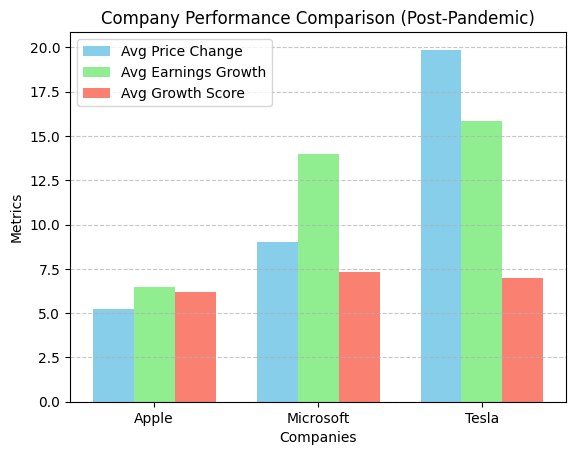

In [45]:
main("stock_data.csv")